In [3]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn import datasets

In [4]:
def sigmoid(x, derive=False):
    if derive:
        return x * (1 - x)
    return 1 / (1 + np.exp(-x))

# Define the data set XOR

In [5]:
iris = datasets.load_iris()
X = iris.data
y = np.atleast_2d(iris.target).T

# Define a learning rate

In [12]:
eta = .01

# Define the number of epochs for learning

In [13]:
epochs = 1000
hidden_units = 10

# Initialize the weights with random numbers

In [14]:
w01 = np.random.random((len(X[0]), hidden_units))
w12 = np.random.random((hidden_units, 1))

# Start feeding forward and backpropagate *epochs* times.

In [15]:
error_total=[]
error_total0=[]
error_total1=[]
error_total2=[]
for epoch in range(epochs):
    # Feed forward
    z_h = np.dot(X, w01)
    a_h = sigmoid(z_h)

    z_o = np.dot(a_h, w12)
    a_o = sigmoid(z_o)

    # Calculate the error
    a_o_error = ((1 / 2) * (np.power((a_o - y), 2)))
    a_o_err_y = np.concatenate((a_o_error,y), axis=1)
    a_o_err_y0 = a_o_err_y[a_o_err_y[:,1]==0][:,0]
    a_o_err_y1 = a_o_err_y[a_o_err_y[:,1]==1][:,0]
    a_o_err_y2 = a_o_err_y[a_o_err_y[:,1]==2][:,0]
    
    error_total = np.append(error_total,sum(a_o_error))
    error_total0 = np.append(error_total0,sum(a_o_err_y0))
    error_total1 = np.append(error_total1,sum(a_o_err_y1))
    error_total2 = np.append(error_total2,sum(a_o_err_y2))
    #print(a_o-y)
    #print(sum(a_o_error))

    # Backpropagation
    ## Output layer
    delta_a_o_error = a_o - y
    delta_z_o = sigmoid(a_o,derive=True)
    delta_w12 = a_h
    delta_output_layer = np.dot(delta_w12.T,(delta_a_o_error * delta_z_o))

    ## Hidden layer
    delta_a_h = np.dot(delta_a_o_error * delta_z_o, w12.T)
    delta_z_h = sigmoid(a_h,derive=True)
    delta_w01 = X
    delta_hidden_layer = np.dot(delta_w01.T, delta_a_h * delta_z_h)

    w01 = w01 - eta * delta_hidden_layer
    w12 = w12 - eta * delta_output_layer

In [19]:
print(sum(a_o_error),sum(a_o_err_y0),sum(a_o_err_y1),sum(a_o_err_y2))

[25.11373874] 0.04329939733562721 0.0021508747271680975 25.068288466482823


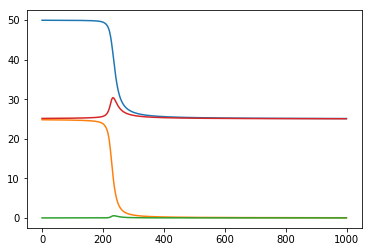

In [20]:
plt.plot(error_total)
plt.plot(error_total0)
plt.plot(error_total1)
plt.plot(error_total2)